In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [2]:
df = pd.read_csv('data/adult.csv', header=None, sep=',\s')

C:\Users\Iurii\AppData\Local\Temp\ipykernel_18256\2975021110.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data/adult.csv', header=None, sep=',\s')


# Data Preparation

In [3]:
# add column names

df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df['occupation'].replace('?', np.NaN, inplace=True)
df['workclass'].replace('?', np.NaN, inplace=True)
df['native_country'].replace('?', np.NaN, inplace=True)

# Data Split

In [4]:
X = df.drop(['income'], axis=1)
y = df['income']

In [5]:
from sklearn.model_selection import (train_test_split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

# Encode Category Data

In [7]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

C:\dev\PIIS\lab2\venv\lib\site-packages\category_encoders\utils.py:28: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(cols):
C:\dev\PIIS\lab2\venv\lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\dev\PIIS\lab2\venv\lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.api.types.is_categorical_dtype(dtype)
C:\dev\PIIS\lab2\venv\lib\site-packages\category_encoders\utils.py:50: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return pd.

# Feature Scaling

In [8]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

# predict
y_pred = gnb.predict(X_test)

# Test GaussianNB Model

In [10]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8083


In [11]:
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8067


In [12]:
# check class distribution in test set

y_test.value_counts()

income
<=50K    7407
>50K     2362
Name: count, dtype: int64

In [13]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


<Axes: >

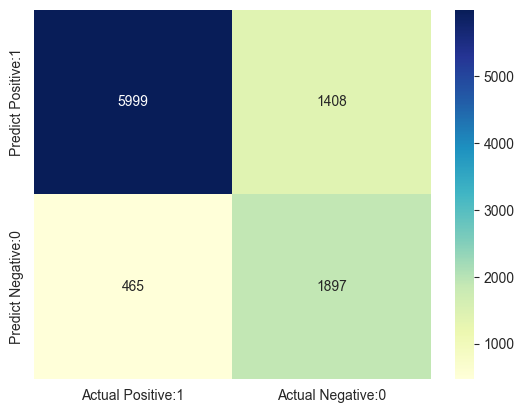

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769


# Support Vector Machine

In [16]:
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC()

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Test SVM Model

In [17]:
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = gnb.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8029
Training-set accuracy score: 0.8067


<Axes: >

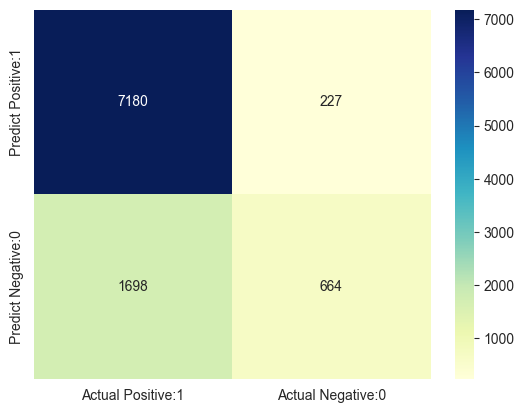

In [18]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88      7407
        >50K       0.75      0.28      0.41      2362

    accuracy                           0.80      9769
   macro avg       0.78      0.63      0.65      9769
weighted avg       0.79      0.80      0.77      9769
